# K-Nearest Neighbor (k-NN) Classification

## The k-NN Classifier Algorithm

Given a trainig set $X_{train}$ with labels $y_{train}$, and given a new instance $x_{test}$ to be classified, then

1. find the $k$ most similar instances (let's call them $X_{NN}$) to $x_{test}$ that are in $X_{train}$ using e.g. eucledian **distance metric**
2. get the labels $y_{NN}$ for the instances in $X_{NN}$
3. predict the label for $x_{test}$ by combining the labels $y_{NN}$ e.g. with **simple majority vote**

## Example with SciKit-Learn

Given this [random 2-class classification data](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html):

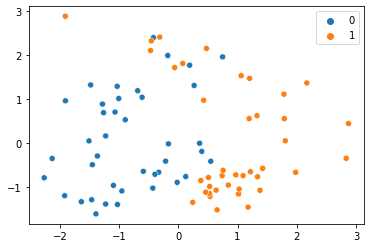

In [2]:
import numpy as np
np.random.seed(31415)
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

sns.scatterplot(x=X_train[:,0], y=X_train[:,1], hue=y_train);

### Train the model

We train the model for different number of neighbors $k$.

A common rule of thumb is that $k = \sqrt{n}$ where $n$ is the **number of samples** in your training set, seems often perform well.

In [44]:
np.sqrt(X_train.shape[0]).astype(int)

8

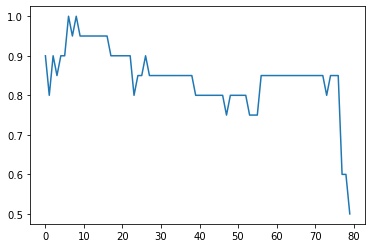

In [14]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

accuracys = []
for k in np.arange(1, len(X_train)+1):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracys.append(model.score(X_test, y_test))

plt.plot(accuracys);

best accuracy is for $k=7$ and $k=9$

In [15]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=9, weights='uniform')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

#### Classification Report

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



#### Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[10  0]
 [ 0 10]]


### Plotting the Decision Boundary

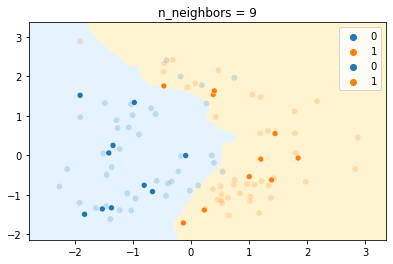

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def plot_knn_decision_boundary(model, X, y, X_, y_):
    cmap = ListedColormap(['#74c1ff30', '#ffc10730'])
    mesh_step_size = 0.05
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6.4, 4))
    plt.pcolormesh(xx, yy, Z, cmap=cmap, shading='auto')
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, alpha=0.2)        # training data
    sns.scatterplot(x=X_[:,0], y=X_[:,1], hue=y_)                # test data
    plt.title("n_neighbors = {}".format(model.n_neighbors))
    plt.show()

plot_knn_decision_boundary(model, X_train, y_train, X_test, y_test);

### Vary k-Value and Weight

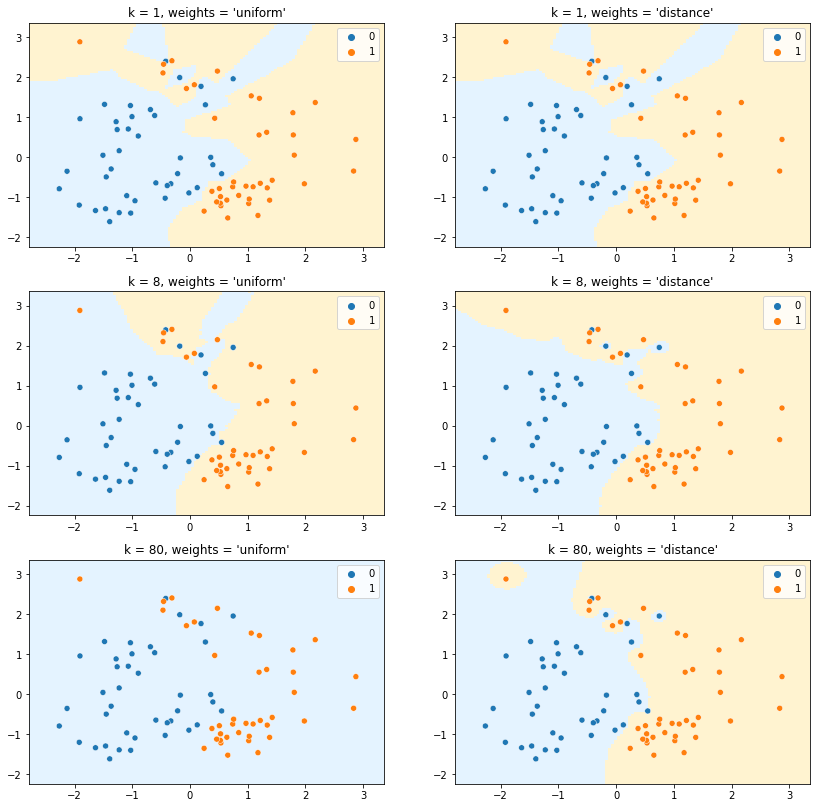

In [65]:
n = X_train.shape[0]

params = [
    {'weights': 'uniform', 'n_neighbors': 1},
    {'weights': 'distance', 'n_neighbors': 1},
    {'weights': 'uniform', 'n_neighbors': np.sqrt(n).astype(int)},
    {'weights': 'distance', 'n_neighbors': np.sqrt(n).astype(int)},
    {'weights': 'uniform', 'n_neighbors': n},
    {'weights': 'distance', 'n_neighbors': n}]

cmap = ListedColormap(['#74c1ff30', '#ffc10730'])
mesh_step_size = 0.05
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))

plt.figure(figsize=(14, 14))

for i, param in enumerate(params):
    model = KNeighborsClassifier(**params[i])
    model.fit(X_train, y_train)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.subplot(3, 2, i + 1)
    plt.pcolormesh(xx, yy, Z, cmap=cmap, shading='auto')
    sns.scatterplot(x=X_train[:,0], y=X_train[:,1], hue=y_train)
    plt.title(f"k = {model.n_neighbors}, weights = '{model.weights}'")


# K-Means Clustering

TODO